In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv('train2.csv', date_parser = True )
data.head()

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
0,0.128348,0.128906,0.128348,0.128348,469033600,0.138588,0.132578,1,0,0
1,0.122210,0.122210,0.121652,0.121652,175884800,0.138979,0.132266,0,1,0
2,0.113281,0.113281,0.112723,0.112723,105728000,0.139732,0.132121,1,0,0
3,0.115513,0.116071,0.115513,0.115513,86441600,0.141071,0.132232,0,1,0
4,0.118862,0.119420,0.118862,0.118862,73449600,0.142215,0.132299,1,0,0


In [3]:
b = data['b']
h = data['h']
s = data['s']

# hot = np.concatenate(, axis=1)
hot = np.column_stack((b, h, s))
hot[-1]

array([0, 1, 0], dtype=int64)

In [4]:
data = data.dropna()
data = data.reset_index(drop=True)

In [5]:
data_training = data[:8000].copy()
data_training

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
0,0.128348,0.128906,0.128348,0.128348,469033600,0.138588,0.132578,1,0,0
1,0.122210,0.122210,0.121652,0.121652,175884800,0.138979,0.132266,0,1,0
2,0.113281,0.113281,0.112723,0.112723,105728000,0.139732,0.132121,1,0,0
3,0.115513,0.116071,0.115513,0.115513,86441600,0.141071,0.132232,0,1,0
4,0.118862,0.119420,0.118862,0.118862,73449600,0.142215,0.132299,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7995,23.957857,24.102858,23.226072,23.430714,812719600,24.062179,23.485129,0,1,0
7996,23.372143,23.892857,23.146786,23.888214,565322800,24.144393,23.428514,0,1,0
7997,23.789642,23.924999,23.612499,23.665358,420128800,24.197661,23.368336,0,1,0
7998,23.553928,23.910000,23.412500,23.686428,437340400,24.264554,23.311350,0,1,0


In [6]:
data_testing = data[8000:].copy()
data_testing

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
8000,24.106428,24.146429,23.952499,24.100000,267416800,24.309964,23.137671,0,1,0
8001,24.116072,24.202499,24.021429,24.052500,202806800,24.292786,23.046429,0,1,0
8002,23.951429,23.983929,23.673214,23.709642,302699600,24.306804,22.953114,0,1,0
8003,23.830357,23.878571,23.473215,23.758572,338321200,24.312572,22.866707,0,1,0
8004,23.777143,24.112143,23.732143,24.106071,367892000,24.302125,22.775021,0,1,0
...,...,...,...,...,...,...,...,...,...,...
10038,113.910004,116.650002,113.550003,116.500000,106243800,115.336002,115.336002,0,1,0
10039,115.699997,116.120003,112.250000,113.160004,161498200,115.045002,115.045002,0,1,0
10040,114.620003,115.550003,114.129997,115.080002,96849000,115.673335,115.673335,0,1,0
10041,116.250000,116.400002,114.589996,114.970001,83477200,115.970001,115.970001,1,0,0


In [7]:
#data_training = data_training.drop(['Date','Adj Close'], axis = 1)

In [8]:
scaler = MinMaxScaler() #read on this from the sklearn - Rich to Rich
data_training = scaler.fit_transform(data_training) #scales data to reduce error
data_training

array([[0.00324658, 0.00326536, 0.0033009 , ..., 1.        , 0.        ,
        0.        ],
       [0.00299331, 0.00298944, 0.00302197, ..., 0.        , 1.        ,
        0.        ],
       [0.00262489, 0.00262149, 0.00265002, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.97954608, 0.98385523, 0.98156698, ..., 0.        , 1.        ,
        0.        ],
       [0.96982017, 0.98323715, 0.97323574, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [9]:
data_training[:,[7,8,9]]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
data_training.shape

(8000, 10)

In [11]:
X_train = []
y_train = []

In [12]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i]) #sliding window of data to help predict next day
    y_train.append(data_training[i,[7,8,9]]) #60 chosen arbitrarily

In [13]:
X_train, y_train = np.array(X_train), np.array(y_train) #converted to np array

In [14]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [15]:
# LSTM MODEL

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 3))

In [18]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            17040     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [19]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['accuracy']) #find a different loss function for classification
history = regressor.fit(X_train, y_train, epochs=100, batch_size=320)

Epoch 1/100
25/25 [==============================] - 9s 367ms/step - loss: 0.1512 - accuracy: 0.9157
Epoch 2/100
25/25 [==============================] - 9s 363ms/step - loss: 0.0546 - accuracy: 0.9262
Epoch 3/100
25/25 [==============================] - 10s 400ms/step - loss: 0.0491 - accuracy: 0.9262
Epoch 4/100
25/25 [==============================] - 10s 394ms/step - loss: 0.0473 - accuracy: 0.9262
Epoch 5/100
25/25 [==============================] - 10s 413ms/step - loss: 0.0463 - accuracy: 0.9262
Epoch 6/100
25/25 [==============================] - 11s 427ms/step - loss: 0.0439 - accuracy: 0.9264
Epoch 7/100
25/25 [==============================] - 11s 426ms/step - loss: 0.0424 - accuracy: 0.9312
Epoch 8/100
25/25 [==============================] - 10s 417ms/step - loss: 0.0413 - accuracy: 0.9335
Epoch 9/100
25/25 [==============================] - 11s 426ms/step - loss: 0.0402 - accuracy: 0.9349
Epoch 10/100
25/25 [==============================] - 11s 428ms/step - loss: 0.0394 

25/25 [==============================] - 11s 455ms/step - loss: 0.0297 - accuracy: 0.9525
Epoch 81/100
25/25 [==============================] - 11s 454ms/step - loss: 0.0294 - accuracy: 0.9526
Epoch 82/100
25/25 [==============================] - 11s 449ms/step - loss: 0.0296 - accuracy: 0.9530
Epoch 83/100
25/25 [==============================] - 12s 465ms/step - loss: 0.0294 - accuracy: 0.9530
Epoch 84/100
25/25 [==============================] - 11s 456ms/step - loss: 0.0296 - accuracy: 0.9526
Epoch 85/100
25/25 [==============================] - 11s 460ms/step - loss: 0.0297 - accuracy: 0.9529
Epoch 86/100
25/25 [==============================] - 11s 457ms/step - loss: 0.0296 - accuracy: 0.9528
Epoch 87/100
25/25 [==============================] - 11s 454ms/step - loss: 0.0294 - accuracy: 0.9539
Epoch 88/100
25/25 [==============================] - 12s 471ms/step - loss: 0.0294 - accuracy: 0.9533
Epoch 89/100
25/25 [==============================] - 12s 482ms/step - loss: 0.0290 - 

In [20]:
data_testing.head()

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
8000,24.106428,24.146429,23.952499,24.100000,267416800,24.309964,23.137671,0,1,0
8001,24.116072,24.202499,24.021429,24.052500,202806800,24.292786,23.046429,0,1,0
8002,23.951429,23.983929,23.673214,23.709642,302699600,24.306804,22.953114,0,1,0
8003,23.830357,23.878571,23.473215,23.758572,338321200,24.312572,22.866707,0,1,0
8004,23.777143,24.112143,23.732143,24.106071,367892000,24.302125,22.775021,0,1,0


In [21]:
data_train = data[:8000].copy()

In [22]:
past_60_days = data_train.tail(60)

In [23]:
df = past_60_days.append(data_testing, ignore_index = True) #for the fist 60 values of testing data set
df.head()

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
0,20.053572,20.267857,19.589285,20.153214,556995600,20.544321,21.209500,0,1,0
1,20.045357,20.231071,19.940357,20.101072,388214400,20.594732,21.257643,0,1,0
2,20.277500,20.494642,20.196428,20.409286,401455600,20.660053,21.306214,0,1,0
3,20.617500,20.618572,20.375000,20.418571,379766800,20.728768,21.352557,0,1,0
4,20.414286,20.735001,20.321428,20.725714,347516400,20.789768,21.407121,0,1,0


In [24]:
inputs = scaler.transform(df) #scaling data
# inputs
#inputs = df.copy()

In [25]:
X_test = []
y_test = []
#reformatting and now feeding data into the model for prediction
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, [7,8,9]])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [26]:
np.array(inputs[61,[7,8,9]])

array([0., 1., 0.])

In [27]:
# X_test[0]

In [28]:
y_pred = regressor.predict(X_test) #predicted values for bhs

In [29]:
y_pred

array([[ 1.3988875e-03,  1.0034444e+00,  2.2977442e-02],
       [ 1.6181245e-03,  1.0039921e+00,  2.2572383e-02],
       [ 1.8423200e-03,  1.0045463e+00,  2.2161119e-02],
       ...,
       [ 3.5119247e-01,  4.0403461e+00, -9.0099555e-01],
       [ 7.8463954e-01,  6.4588461e+00, -1.0056701e+00],
       [ 1.6011163e+00,  1.4275494e+01, -2.1876020e+00]], dtype=float32)

In [30]:
#y_pred[2000:]

In [31]:
scaler.scale_ #generated coefficient for scaling our data back to initial

array([4.12614585e-02, 4.12080197e-02, 4.16564383e-02, 4.15242368e-02,
       1.34766313e-10, 4.12238761e-02, 4.24183490e-02, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

In [32]:
# scale = 1/4.12614585e-02
# scale

In [33]:
# y_pred = (y_pred*scale)
#y_test = y_test*scale

In [34]:
for i in range(y_pred.shape[0]):
    #print(i,y_pred[i])
    k = (np.argmax(y_pred[i]))
    y_pred[i] = [0,0,0]
    y_pred[i][k] = 1
    #for dealing with the negative and non-format abiding output predictions

In [35]:
y_pred.shape[0] ## Total predictions

2043

In [36]:
count = 0
for i in range(y_pred.shape[0]):
    if np.array_equal(y_pred[i],y_test[i]):
        pass
    else:
        count+=1
print("No of Times where our model predicted wrong output",count)
# print(i,y_pred[i],y_test[i])

No of Times where our model predicted wrong output 57


In [37]:
import matplotlib.pyplot as plt

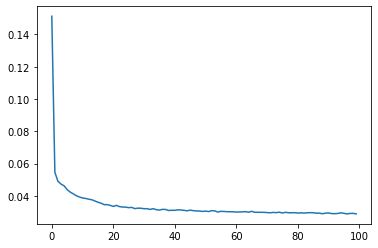

In [38]:
plt.plot(history.history['loss'])

In [39]:
## Training our NN model

In [40]:
import pandas as pd
import numpy as np

In [41]:
data = pd.read_csv('train2.csv', date_parser = True )
b = data['b']
h = data['h']
s = data['s']

# hot = np.concatenate(, axis=1)
hot = np.column_stack((b, h, s))
hot[-1]

data = data.dropna()
data = data.reset_index(drop=True)

In [42]:
# history.history['loss']
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

scaler = MinMaxScaler() #read on this from the sklearn - Rich to Rich
data = scaler.fit_transform(data) #scales data to reduce error

game_sizes = [5,25,45,65,85]
losses = []
modelList = []
startIndexList = []
for game_size in game_sizes:
    X_train = []
    y_train = []
    for games in range(25):
        starting_index = random.randint(0,len(data)-2*game_size-1)
        play_range_data = data[starting_index:starting_index+game_size]
        startIndexList.append(starting_index)
        X_train = list(X_train)
        y_train = list(y_train)
        for i in range(2, play_range_data.shape[0]):
            X_train.append(play_range_data[i-2:i])
            y_train.append(play_range_data[i,[7,8,9]])
            
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    regressor = Sequential()

    regressor.add(LSTM(units = 60, activation = 'sigmoid', return_sequences = True, input_shape = (X_train.shape[1], 10)))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 120, activation = 'sigmoid', return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 150, activation = 'sigmoid', return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 75, activation = 'sigmoid'))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 3))

    regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['accuracy']) #find a different loss function for classification
    history = regressor.fit(X_train, y_train, epochs=1000, batch_size=game_size)
#     plt.plot(history.history['loss'], label = str(game_size))
    losses.append(history.history['loss'])
    modelList.append(regressor)
    
    
    
# plt.ylabel('Loss')
# plt.title('Loss for Each Game Size')
# plt.xlabel('Epochs')
# plt.legend(loc='best')

# # plt.show()

# plt.xlim(20,100)

# # plt.show()

# plt.plot()

Epoch 1/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1907 - accuracy: 0.7467
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9867
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9867
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9867
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9867
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9867
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9867
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9867
Epoch 9/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9867
Epoch 10/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9867

15/15 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9867
Epoch 83/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9867
Epoch 84/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9867
Epoch 85/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9867
Epoch 86/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9867
Epoch 87/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9867
Epoch 88/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9867
Epoch 89/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9867
Epoch 90/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9867
Epoch 91/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9867
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9867
Epoch 163/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9867
Epoch 164/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9867
Epoch 165/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9867
Epoch 166/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9867
Epoch 167/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9867
Epoch 168/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9867
Epoch 169/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9867
Epoch 170/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9867
Epoch 171/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9867
Epoch 243/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9867
Epoch 244/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9867
Epoch 245/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9867
Epoch 246/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9867
Epoch 247/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9867
Epoch 248/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9867
Epoch 249/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9867
Epoch 250/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9867
Epoch 251/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.

15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9867
Epoch 323/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9867
Epoch 324/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9867
Epoch 325/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.9867
Epoch 326/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9867
Epoch 327/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9867
Epoch 328/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 329/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9867
Epoch 330/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.9867
Epoch 331/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9867
Epoch 403/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9867
Epoch 404/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0095 - accuracy: 0.9867
Epoch 405/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9867
Epoch 406/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 407/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9867
Epoch 408/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9867
Epoch 409/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9867
Epoch 410/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9867
Epoch 411/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9867
Epoch 483/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9867
Epoch 484/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9867
Epoch 485/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9867
Epoch 486/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9867
Epoch 487/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 488/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9867
Epoch 489/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9867
Epoch 490/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9867
Epoch 491/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9867
Epoch 563/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9867
Epoch 564/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 565/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9867
Epoch 566/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9867
Epoch 567/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9867
Epoch 568/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9867
Epoch 569/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9867
Epoch 570/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9867
Epoch 571/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9867
Epoch 643/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9867
Epoch 644/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9867
Epoch 645/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 646/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 647/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 648/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9867
Epoch 649/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9867
Epoch 650/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 651/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 723/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 0.9867
Epoch 724/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 725/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9867
Epoch 726/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 727/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 728/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 729/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 730/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 731/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 803/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9867
Epoch 804/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 805/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 806/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 807/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9867
Epoch 808/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9867
Epoch 809/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9867
Epoch 810/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 811/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9867
Epoch 883/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 884/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 885/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 886/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 887/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 888/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9867
Epoch 889/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 890/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 891/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.

15/15 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9867
Epoch 963/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9867
Epoch 964/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 965/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9867
Epoch 966/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 967/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 968/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 969/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9867
Epoch 970/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9867
Epoch 971/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.

Epoch 43/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9617
Epoch 44/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9617
Epoch 45/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9617
Epoch 46/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9617
Epoch 47/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.9617
Epoch 48/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9617
Epoch 49/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9617
Epoch 50/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.9617
Epoch 51/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.9617
Epoch 52/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0280 - accurac

23/23 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9617
Epoch 124/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9617
Epoch 125/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9617
Epoch 126/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9617
Epoch 127/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9617
Epoch 128/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9617
Epoch 129/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9617
Epoch 130/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9617
Epoch 131/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9617
Epoch 132/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9617
Epoch 204/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9617
Epoch 205/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9617
Epoch 206/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9617
Epoch 207/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9617
Epoch 208/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9617
Epoch 209/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9617
Epoch 210/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9617
Epoch 211/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9617
Epoch 212/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.

23/23 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.9617
Epoch 284/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9617
Epoch 285/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9617
Epoch 286/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9617
Epoch 287/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9617
Epoch 288/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9617
Epoch 289/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9617
Epoch 290/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9617
Epoch 291/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9617
Epoch 292/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9617
Epoch 364/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9617
Epoch 365/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9617
Epoch 366/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9617
Epoch 367/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9617
Epoch 368/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9617
Epoch 369/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9617
Epoch 370/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9617
Epoch 371/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9617
Epoch 372/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9617
Epoch 444/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9617
Epoch 445/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9617
Epoch 446/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9617
Epoch 447/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9617
Epoch 448/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9617
Epoch 449/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9617
Epoch 450/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9617
Epoch 451/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9617
Epoch 452/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 0.9617
Epoch 524/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9617
Epoch 525/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 0.9617
Epoch 526/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9617
Epoch 527/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9617
Epoch 528/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9617
Epoch 529/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 530/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9617
Epoch 531/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9617
Epoch 532/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 604/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 605/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9617
Epoch 606/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9617
Epoch 607/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 608/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9617
Epoch 609/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 610/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9617
Epoch 611/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9617
Epoch 612/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 684/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 685/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 686/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 687/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 688/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9617
Epoch 689/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 690/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 691/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9617
Epoch 692/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9617
Epoch 764/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9617
Epoch 765/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9617
Epoch 766/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9617
Epoch 767/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 768/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 769/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9617
Epoch 770/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 771/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9617
Epoch 772/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9617
Epoch 844/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9617
Epoch 845/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9617
Epoch 846/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 847/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 848/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9617
Epoch 849/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 850/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.9617
Epoch 851/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9617
Epoch 852/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.

23/23 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9617
Epoch 924/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 925/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 926/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9617
Epoch 927/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9617
Epoch 928/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9617
Epoch 929/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9617
Epoch 930/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9617
Epoch 931/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9617
Epoch 932/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0558 - accuracy: 0.9507
Epoch 4/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0484 - accuracy: 0.9507
Epoch 5/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0449 - accuracy: 0.9507
Epoch 6/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0436 - accuracy: 0.9507
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0403 - accuracy: 0.9507
Epoch 8/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0395 - accuracy: 0.9507
Epoch 9/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0375 - accuracy: 0.9507
Epoch 10/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9507
Epoch 11/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0374 - accuracy: 0.9507
Epoch 12/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0376 - accuracy: 0.9507
Epoch 13/1

24/24 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.9507
Epoch 84/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.9507
Epoch 85/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0319 - accuracy: 0.9507
Epoch 86/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 0.9507
Epoch 87/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0312 - accuracy: 0.9507
Epoch 88/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0321 - accuracy: 0.9507
Epoch 89/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 0.9507: 0s - loss: 0.0309 - accuracy: 0.
Epoch 90/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0317 - accuracy: 0.9507
Epoch 91/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.9507
Epoch 92/1000
24/24 [==============================] - 0s 6ms/step - lo

24/24 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 0.9591
Epoch 164/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0278 - accuracy: 0.9581
Epoch 165/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0273 - accuracy: 0.9591
Epoch 166/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0272 - accuracy: 0.9591
Epoch 167/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0273 - accuracy: 0.9591
Epoch 168/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0274 - accuracy: 0.9581
Epoch 169/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0268 - accuracy: 0.9591
Epoch 170/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0275 - accuracy: 0.9572
Epoch 171/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0275 - accuracy: 0.9572
Epoch 172/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0275 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0268 - accuracy: 0.9581
Epoch 244/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9600
Epoch 245/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9591
Epoch 246/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0265 - accuracy: 0.9591
Epoch 247/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0261 - accuracy: 0.9591
Epoch 248/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0262 - accuracy: 0.9591
Epoch 249/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0265 - accuracy: 0.9581
Epoch 250/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0262 - accuracy: 0.9591
Epoch 251/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0261 - accuracy: 0.9591
Epoch 252/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9609
Epoch 324/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9600
Epoch 325/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9591
Epoch 326/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9591
Epoch 327/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0259 - accuracy: 0.9591
Epoch 328/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9581
Epoch 329/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0263 - accuracy: 0.9572
Epoch 330/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9572
Epoch 331/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 0.9609
Epoch 332/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9619
Epoch 404/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9628
Epoch 405/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9591
Epoch 406/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9591
Epoch 407/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9591
Epoch 408/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9619
Epoch 409/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9619
Epoch 410/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9591
Epoch 411/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9600
Epoch 412/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0253 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9581
Epoch 484/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9609
Epoch 485/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9600
Epoch 486/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9591
Epoch 487/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9600
Epoch 488/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0253 - accuracy: 0.9591
Epoch 489/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0257 - accuracy: 0.9591
Epoch 490/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0253 - accuracy: 0.9600
Epoch 491/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9609
Epoch 492/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9581
Epoch 564/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9591
Epoch 565/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9600
Epoch 566/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0253 - accuracy: 0.9591
Epoch 567/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0257 - accuracy: 0.9581
Epoch 568/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9600
Epoch 569/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9609
Epoch 570/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9581
Epoch 571/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9609
Epoch 572/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9591
Epoch 644/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9609
Epoch 645/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9572
Epoch 646/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9600
Epoch 647/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9619
Epoch 648/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9609
Epoch 649/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9609
Epoch 650/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9572
Epoch 651/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 0.9581
Epoch 652/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0259 - accuracy: 0.9591
Epoch 724/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9591
Epoch 725/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.9609
Epoch 726/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.9591
Epoch 727/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0253 - accuracy: 0.9591
Epoch 728/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9572
Epoch 729/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.9609
Epoch 730/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9600
Epoch 731/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9581
Epoch 732/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9609
Epoch 804/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 0.9572
Epoch 805/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.9619
Epoch 806/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9600
Epoch 807/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9619
Epoch 808/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9572
Epoch 809/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9600
Epoch 810/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9600
Epoch 811/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9609
Epoch 812/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9591
Epoch 884/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.9600
Epoch 885/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0242 - accuracy: 0.9600
Epoch 886/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9581
Epoch 887/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9591
Epoch 888/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9600
Epoch 889/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9609
Epoch 890/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9609
Epoch 891/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9600
Epoch 892/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.

24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9600
Epoch 964/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0242 - accuracy: 0.9591
Epoch 965/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9581
Epoch 966/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9600
Epoch 967/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9600
Epoch 968/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9600
Epoch 969/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9600
Epoch 970/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9581
Epoch 971/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9600
Epoch 972/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.

Epoch 44/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0290 - accuracy: 0.9581
Epoch 45/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0293 - accuracy: 0.9581
Epoch 46/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9581
Epoch 47/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 0.9581
Epoch 48/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0291 - accuracy: 0.9581
Epoch 49/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0286 - accuracy: 0.9581
Epoch 50/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0289 - accuracy: 0.9581
Epoch 51/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9581
Epoch 52/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 0.9581
Epoch 53/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0289 - accurac

25/25 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.9581
Epoch 125/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 0.9581
Epoch 126/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.9581
Epoch 127/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0267 - accuracy: 0.9581
Epoch 128/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0262 - accuracy: 0.9581
Epoch 129/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.9581
Epoch 130/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.9581
Epoch 131/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.9581
Epoch 132/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0265 - accuracy: 0.9581
Epoch 133/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0238 - accuracy: 0.9625
Epoch 205/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 0.9619
Epoch 206/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0239 - accuracy: 0.9619
Epoch 207/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0241 - accuracy: 0.9619
Epoch 208/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0244 - accuracy: 0.9606
Epoch 209/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0240 - accuracy: 0.9625
Epoch 210/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0241 - accuracy: 0.9613
Epoch 211/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.9600
Epoch 212/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0242 - accuracy: 0.9613
Epoch 213/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.

25/25 [==============================] - 0s 6ms/step - loss: 0.0237 - accuracy: 0.9619
Epoch 285/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9625
Epoch 286/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.9625
Epoch 287/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.9625
Epoch 288/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9619
Epoch 289/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0236 - accuracy: 0.9619
Epoch 290/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0240 - accuracy: 0.9619
Epoch 291/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.9613
Epoch 292/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0237 - accuracy: 0.9619
Epoch 293/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0238 - accuracy: 0.

25/25 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.9606
Epoch 365/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 0.9625
Epoch 366/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0237 - accuracy: 0.9600
Epoch 367/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.9613
Epoch 368/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.9613
Epoch 369/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9625
Epoch 370/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0239 - accuracy: 0.9613
Epoch 371/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0238 - accuracy: 0.9600
Epoch 372/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 0.9625
Epoch 373/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.

25/25 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.9644
Epoch 445/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.9606
Epoch 446/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0231 - accuracy: 0.9632
Epoch 447/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0228 - accuracy: 0.9619
Epoch 448/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9613
Epoch 449/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9613
Epoch 450/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9619
Epoch 451/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0231 - accuracy: 0.9619
Epoch 452/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.9625
Epoch 453/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0239 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9651
Epoch 525/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9644
Epoch 526/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9632
Epoch 527/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9638
Epoch 528/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0220 - accuracy: 0.9651
Epoch 529/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9651
Epoch 530/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9638
Epoch 531/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0221 - accuracy: 0.9644
Epoch 532/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0222 - accuracy: 0.9632
Epoch 533/1000
25/25 [==============================] - 0s 11ms/step - loss: 0.0221 - accuracy: 0

25/25 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9644
Epoch 605/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0224 - accuracy: 0.9638
Epoch 606/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9625
Epoch 607/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9632
Epoch 608/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.9638
Epoch 609/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9613
Epoch 610/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9644
Epoch 611/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9651
Epoch 612/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9644
Epoch 613/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0220 - accuracy: 0.

25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9651
Epoch 684/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9632
Epoch 685/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9651
Epoch 686/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9638
Epoch 687/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9657
Epoch 688/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9644
Epoch 689/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0220 - accuracy: 0.9651
Epoch 690/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9644
Epoch 691/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0226 - accuracy: 0.9625
Epoch 692/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9632
Epoch 764/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9651
Epoch 765/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 0.9644
Epoch 766/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0224 - accuracy: 0.9638
Epoch 767/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9638
Epoch 768/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9644
Epoch 769/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9638
Epoch 770/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 0.9644
Epoch 771/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.9651
Epoch 772/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.

25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9632
Epoch 844/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0220 - accuracy: 0.9651
Epoch 845/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9632
Epoch 846/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9644
Epoch 847/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.9638
Epoch 848/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9632
Epoch 849/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9644
Epoch 850/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9644
Epoch 851/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9644
Epoch 852/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.

25/25 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.9625
Epoch 924/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 0.9632
Epoch 925/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.9625
Epoch 926/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9644
Epoch 927/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9638
Epoch 928/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9644
Epoch 929/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.9632
Epoch 930/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9657
Epoch 931/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0220 - accuracy: 0.9657
Epoch 932/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.

25/25 [==============================] - 0s 8ms/step - loss: 0.0525 - accuracy: 0.9484
Epoch 4/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0476 - accuracy: 0.9494
Epoch 5/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0443 - accuracy: 0.9494
Epoch 6/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0419 - accuracy: 0.9494
Epoch 7/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0409 - accuracy: 0.9494
Epoch 8/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9494
Epoch 9/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0388 - accuracy: 0.9494
Epoch 10/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9494
Epoch 11/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 0.9494
Epoch 12/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0376 - accuracy: 0.9494
Epoch 13/1

25/25 [==============================] - 0s 12ms/step - loss: 0.0254 - accuracy: 0.9634
Epoch 85/1000
25/25 [==============================] - 0s 10ms/step - loss: 0.0258 - accuracy: 0.9614
Epoch 86/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.9619
Epoch 87/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0253 - accuracy: 0.9624
Epoch 88/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.9634
Epoch 89/1000
25/25 [==============================] - 0s 13ms/step - loss: 0.0259 - accuracy: 0.9629
Epoch 90/1000
25/25 [==============================] - 0s 10ms/step - loss: 0.0252 - accuracy: 0.9624
Epoch 91/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.0255 - accuracy: 0.9634
Epoch 92/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9629
Epoch 93/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9619


25/25 [==============================] - 0s 7ms/step - loss: 0.0242 - accuracy: 0.9634
Epoch 165/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9634
Epoch 166/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0239 - accuracy: 0.9639
Epoch 167/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 0.9624
Epoch 168/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0239 - accuracy: 0.9639
Epoch 169/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0244 - accuracy: 0.9634
Epoch 170/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9624
Epoch 171/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 0.9639
Epoch 172/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 0.9629
Epoch 173/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0238 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0237 - accuracy: 0.9639
Epoch 245/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9634
Epoch 246/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9639
Epoch 247/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9634
Epoch 248/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9639
Epoch 249/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9634
Epoch 250/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9629
Epoch 251/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9639
Epoch 252/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.9629
Epoch 253/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9634
Epoch 325/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.9639
Epoch 326/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9643
Epoch 327/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0232 - accuracy: 0.9639
Epoch 328/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9643
Epoch 329/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9639
Epoch 330/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9643
Epoch 331/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9643
Epoch 332/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9634
Epoch 333/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9639
Epoch 405/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9648
Epoch 406/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9643
Epoch 407/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9629
Epoch 408/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9629
Epoch 409/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9643
Epoch 410/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9629
Epoch 411/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9648
Epoch 412/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0227 - accuracy: 0.9643
Epoch 413/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.

25/25 [==============================] - 0s 8ms/step - loss: 0.0227 - accuracy: 0.9643
Epoch 485/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9639
Epoch 486/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9634
Epoch 487/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9639
Epoch 488/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9634
Epoch 489/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.9643
Epoch 490/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9648
Epoch 491/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9648
Epoch 492/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9643
Epoch 493/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9629
Epoch 565/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9648
Epoch 566/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9634
Epoch 567/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9643
Epoch 568/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9639
Epoch 569/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9639
Epoch 570/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9643
Epoch 571/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 0.9639
Epoch 572/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9629
Epoch 573/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.

25/25 [==============================] - 0s 8ms/step - loss: 0.0222 - accuracy: 0.9643
Epoch 645/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.9639
Epoch 646/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9653
Epoch 647/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.0226 - accuracy: 0.9639
Epoch 648/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9639
Epoch 649/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9648
Epoch 650/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9634
Epoch 651/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9648
Epoch 652/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9648
Epoch 653/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9643
Epoch 725/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9629
Epoch 726/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.9648
Epoch 727/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9634
Epoch 728/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9643
Epoch 729/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9643
Epoch 730/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9624
Epoch 731/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9634
Epoch 732/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9648
Epoch 733/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9639
Epoch 805/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9648
Epoch 806/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9643
Epoch 807/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9634
Epoch 808/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9639
Epoch 809/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 0.9629
Epoch 810/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0232 - accuracy: 0.9634
Epoch 811/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9643
Epoch 812/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0223 - accuracy: 0.9648
Epoch 813/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9639
Epoch 885/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9629
Epoch 886/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9639
Epoch 887/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9643
Epoch 888/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9634
Epoch 889/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9653
Epoch 890/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9639
Epoch 891/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9629
Epoch 892/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9634
Epoch 893/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.

25/25 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9639
Epoch 965/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9629
Epoch 966/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9639
Epoch 967/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9634
Epoch 968/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9648
Epoch 969/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9634
Epoch 970/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0227 - accuracy: 0.9639
Epoch 971/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.0225 - accuracy: 0.9643
Epoch 972/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 0.9639
Epoch 973/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.

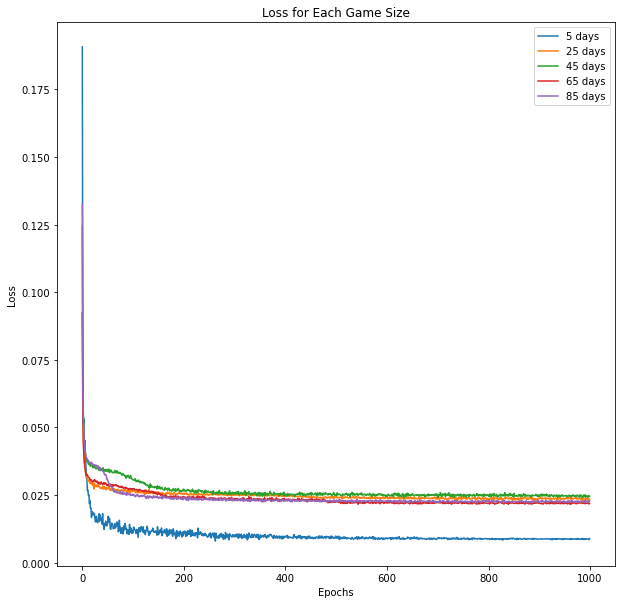

In [43]:
plt.figure(figsize=(10, 10))
for loss,size in zip(losses,game_sizes):
    plt.plot(loss,label= str(size) +' days')
plt.ylabel('Loss')
plt.title('Loss for Each Game Size')
plt.xlabel('Epochs')
plt.legend(loc='best')

plt.show()

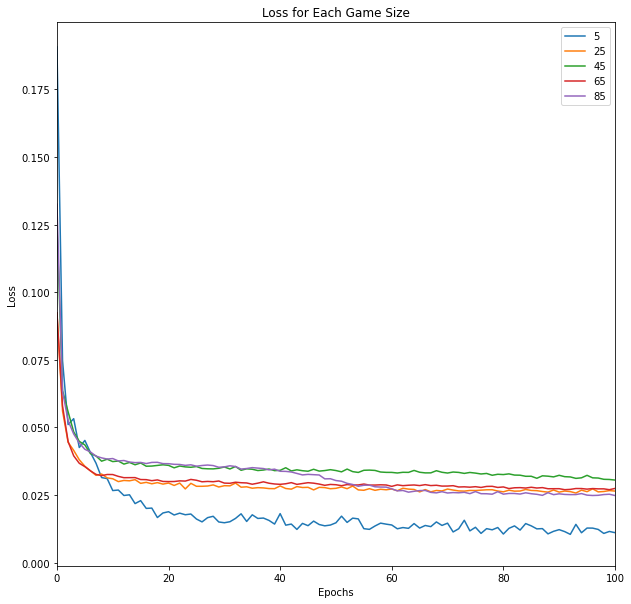

In [62]:
plt.figure(figsize=(10, 10))
for loss,size in zip(losses,game_sizes):
    plt.plot(loss,label=size)
plt.ylabel('Loss')
plt.title('Loss for Each Game Size')
plt.xlabel('Epochs')
plt.legend(loc='best')

plt.xlim(0,100)

plt.show()

# # put in report of compounding accuracy i.e. 0.98*0.98 etc.

In [45]:
# plt.figure(figsize=(10, 10))
# for loss,size in zip(losses,game_sizes):
#     plt.plot(loss,label=size)
# plt.ylabel('Loss')
# plt.title('Loss for Each Game Size')
# plt.xlabel('Epochs')
# plt.legend(loc='best')


# plt.xlim(20,100)
# plt.ylim(0,0.04)


# # plt.show()

In [46]:
# The x-axis should be actual NN output, and the y-axis should be target NN output.  
# So you should have 5 scatter plots, one per problem instance.
# plotting for training data

game_sizes = [5,25,45,65,85]
yPredList = []
yTestList = []

for game_size, regressor,startIndex in zip(game_sizes,modelList,startIndexList):
    X_train = []
    y_train = []
    #for games in range(25):
    #starting_index = data.shape[0] - game_size - 1
    play_range_data = data[startIndex-2:startIndex+game_size]
    X_train = list(X_train)
    y_train = list(y_train)
    for i in range(2, play_range_data.shape[0]):
        X_train.append(play_range_data[i-2:i])
        y_train.append(play_range_data[i,[7,8,9]])
       
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_pred = regressor.predict(X_train)
    
    for i in range(y_pred.shape[0]):
    #print(i,y_pred[i])
        k = (np.argmax(y_pred[i]))
        y_pred[i] = [0,0,0]
        y_pred[i][k] = 1
    
    yPredList.append(y_pred)
    yTestList.append(y_train)  
    count = 0
    for i in range(y_pred.shape[0]):
        if np.array_equal(y_pred[i],y_train[i]):
            pass
        else:
            count+=1
    print("No of Times where our model predicted wrong output",count) 


No of Times where our model predicted wrong output 0
No of Times where our model predicted wrong output 2
No of Times where our model predicted wrong output 1
No of Times where our model predicted wrong output 2
No of Times where our model predicted wrong output 3


In [47]:
def oneHotToAction(outputs):
    actionsList = []
    for i in outputs:
        #print(i)
        actions = []
        for j in i:
            #print(j)
            k = (np.argmax(j))
            if k == 0 :
                act = 'b'
            if k == 1:
                act = 'h'
            else:
                act = 's'
            actions.append(act)
        actionsList.append(actions)
    return actionsList

In [48]:
actionsListPredicted = oneHotToAction(yPredList)
actionsListActual = oneHotToAction(yTestList) 

5 5
['h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 5, 'SELL': 0} {'BUY': 0, 'HOLD': 5, 'SELL': 0}


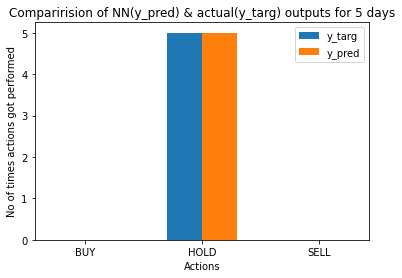

25 25
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 's'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 23, 'SELL': 2} {'BUY': 0, 'HOLD': 25, 'SELL': 0}


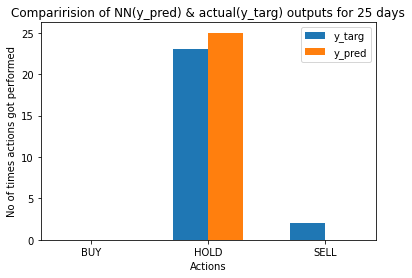

45 45
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 44, 'SELL': 1} {'BUY': 0, 'HOLD': 45, 'SELL': 0}


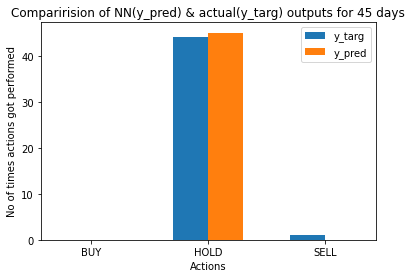

65 65
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 63, 'SELL': 2} {'BUY': 0, 'HOLD': 65, 'SELL': 0}


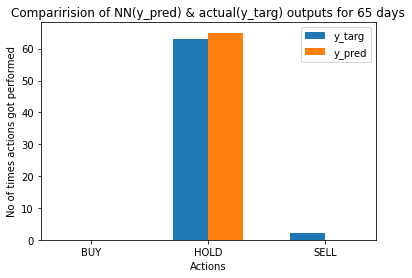

85 85
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']
{'BUY': 0, 'HOLD': 82, 'SELL': 3} {'BUY': 0, 'HOLD': 85, 'SELL': 0}


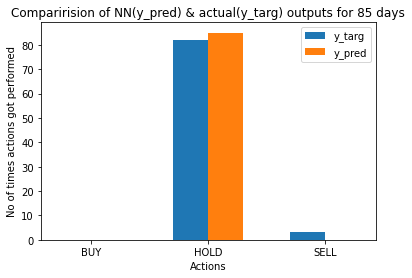

In [49]:
dictActual = {'BUY':0,'HOLD':0, 'SELL':0}
dictPred = {'BUY':0,'HOLD':0, 'SELL':0}
for i,size in zip(range(len(yTestList)),game_sizes):
    #print(actionsListPredicted[i], actionsListActual[i])
    x = actionsListActual[i]
    y = actionsListPredicted[i]
    dictActual['BUY'] = x.count('b')
    dictActual['HOLD'] = x.count('h')
    dictActual['SELL'] = x.count('s')
    dictPred['BUY'] = y.count('b')
    dictPred['HOLD'] = y.count('h')
    dictPred['SELL'] = y.count('s')
    
    actualList = list(dictActual.values())
    predList = list(dictPred.values())
    
    print(len(x),len(y))
    print(x,y)
    print(dictActual, dictPred)
#     plt.bar(*zip(*dictActual.items()))
#     plt.bar(*zip(*dictPred.items()))
#     plt.show()
    
    N = 3
    
    ind = np.arange(N)
    
    # Width of a bar 
    width = 0.3       

    # Plotting
    plt.bar(ind, actualList, width, label='y_targ')
    plt.bar(ind + width, predList, width, label='y_pred')

    plt.xlabel('Actions')
    plt.ylabel('No of times actions got performed')
    plt.title('Comparirision of NN(y_pred) & actual(y_targ) outputs for %i days' %size)

    plt.xticks(ind + width / 2, ('BUY', 'HOLD', 'SELL'))

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    plt.show()

    # plt.ylabel('Actions')
    # plt.title('')
    # plt.xlabel('Days')
    # plt.legend(loc='best')

In [50]:
## TESTING OUR 5 TRAINED MODELS WITH TEST DATA

In [51]:

game_sizes = [5,25,45,65,85]
yPredList = []
yTestList = []

for game_size, regressor in zip(game_sizes,modelList):
    X_test = []
    y_test = []
    #for games in range(25):
    starting_index = data.shape[0] - game_size - 1
    play_range_data = data[starting_index-2:starting_index+game_size]
    X_test = list(X_test)
    y_test = list(y_test)
    for i in range(2, play_range_data.shape[0]):
        X_test.append(play_range_data[i-2:i])
        y_test.append(play_range_data[i,[7,8,9]])
       
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_pred = regressor.predict(X_test)
    
    for i in range(y_pred.shape[0]):
    #print(i,y_pred[i])
        k = (np.argmax(y_pred[i]))
        y_pred[i] = [0,0,0]
        y_pred[i][k] = 1
    
    yPredList.append(y_pred)
    yTestList.append(y_test)  
    count = 0
    for i in range(y_pred.shape[0]):
        if np.array_equal(y_pred[i],y_test[i]):
            pass
        else:
            count+=1
    print("No of Times where our model predicted wrong output",count)    
    


No of Times where our model predicted wrong output 1
No of Times where our model predicted wrong output 1
No of Times where our model predicted wrong output 1
No of Times where our model predicted wrong output 3
No of Times where our model predicted wrong output 4


In [52]:
modelList

In [53]:
yPredList

[array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]

In [54]:
yTestList

[array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
      

In [55]:
actionsListPredicted = oneHotToAction(yPredList)
actionsListActual = oneHotToAction(yTestList) 

In [56]:
for i in range(len(yTestList)):
    print(actionsListPredicted[i], actionsListActual[i])

['h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 's']
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's']
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 's']
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'

In [57]:
import simulation_nn_tree as t
import player as p 

In [58]:


if __name__ == "__main__":
 
    game_len_results = []
    nodes_processed_list = []
    random_cash_list = []
    game_len_results_basic = []
    nodes_processed_list_basic = []
  
    game_sizes = [5,25,45,65,85]

    
#     for i in range(100):
#         random_cash_list.append(random.randint(5000,15000)) # Generating 100 random cash values for 100 simulations with 5 game sizes 
#     random_cash_list.sort()

    random_cash_list = [5002, 5071, 5232, 5235, 5389, 5439, 5514, 5628, 5765, 5894, 5953, 5984, 6112, 6152, 6159, 
                        6314, 6320, 6376, 6429, 6694, 6752, 6821, 6879, 6927, 7120, 7179, 7270, 7278, 7621, 7694, 
                        7710, 7711, 7723, 7748, 7792, 7849, 7856, 7893, 7905, 8000, 8046, 8476, 8592, 8636, 8820, 
                        8913, 9058, 9084, 9160, 9419, 9499, 9666, 9683, 10140, 10145, 10203, 10366, 10450, 10473, 
                        10481, 10522, 10680, 10684, 10697, 10776, 11012, 11064, 11207, 11213, 11396, 11478, 11747, 
                        11823, 12043, 12217, 12420, 12446, 12517, 12716, 12961, 13055, 13401, 13402, 13406, 13413, 
                        13416, 13452, 13472, 13488, 13675, 13741, 14006, 14036, 14081, 14193, 14245, 14548, 14616, 
                        14948, 14987]

    ## Beam Search AI
    for game_len, actions in zip(game_sizes, actionsListPredicted) :
        print("Game Length:",game_len)
        result_list = []
        nodes_count_list = []
        print('--------------------------------------------')
        print(game_len)
        print('--------------------------------------------')
        for cash in random_cash_list:
            print("starting with cash:",cash)
            player_obj = p.Player('AAPL', cash, {'AAPL': 0})
            node = t.Node(player=player_obj)
            result = t.beam_search(node, 4, game_len, actions)
            final_result = result[0]
            nodes_processed = result[1]
            result_list.append(final_result)
            nodes_count_list.append(nodes_processed)
            
        game_len_results.append(result_list)
        nodes_processed_list.append(nodes_count_list)
 
    #print(game_len_results)
    #print(nodes_processed_list)


    


Game Length: 5
--------------------------------------------
5
--------------------------------------------
starting with cash: 5002
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 4774.179992
Portfolio {'AAPL': 2}
Last day Open Price 115.279999
Total Cash Value 5004.73999
Total Nodes Processed 45
Wow! our AI made profit of:2.7399900000000343

starting with cash: 5071
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
A

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 6086.179992
Portfolio {'AAPL': 2}
Last day Open Price 115.279999
Total Cash Value 6316.73999
Total Nodes Processed 45
Wow! our AI made profit of:2.7399900000000343

starting with cash: 6320
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 6092.179992
Portfolio {'AAPL': 2}
Last day Open Price 115.279999
Total Cash Value 6322.73999
Total Nodes

No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 7551.269988
Portfolio {'AAPL': 3}
Last day Open Price 115.279999
Total Cash Value 7897.109985
Total Nodes Processed 45
Wow! our AI made profit of:4.1099850000000515

starting with cash: 7905
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 7563.269988
Portfolio {'AAPL': 3}
Last day Open Price 115.279999
Total Cash Value 7909.109985
Total Nodes Proces

level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 9227.359984
Portfolio {'AAPL': 4}
Last day Open Price 115.279999
Total Cash Value 9688.47998
Total Nodes Processed 45
Wow! our AI made profit of:5.479980000000069

starting with cash: 10140
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 9684.359984
Portfolio {'AAPL': 4}
Last day Open Price 115.279999
Total Cash Value 10145.47998
Total Nodes Processed 45
Wow! our AI made profit of:5.479980000000069

starting with cash: 10145
level: 0
No of nodes Processed:  3
Actions AI chose

level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 11473.44998
Portfolio {'AAPL': 5}
Last day Open Price 115.279999
Total Cash Value 12049.849975
Total Nodes Processed 45
Wow! our AI made profit of:6.849974999999176

starting with cash: 12217
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 11647.44998
Portfolio {'AAPL': 5}
Last day Open Price 115.279999
Total Cash Value 12223.849975
Total Nodes Processed 45
Wow! our AI made profit of:6.849974999999176

starting with cash: 12420
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 13057.539976
Portfolio {'AAPL': 6}
Last day Open Price 115.279999
Total Cash Value 13749.21997
Total Nodes Processed 45
Wow! our AI made profit of:8.219970000000103

starting with cash: 14006
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 13322.539976
Portfolio {'AAPL': 6}
Last day Open Price 115.279999
Total Cash Value 14014.21997
Total N

level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 3698.979980000001
Portfolio {'AAPL': 12}
Last day Open Price 115.279999
Total Cash Value 5082.339968000001
Total Nodes Processed 285
Wow! our AI made profit of:11.339968000001136

starting with cash: 5232
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', '

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of 

level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of no

level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No

level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 4985.21997
Portfolio {'AAPL': 17}
Last day Open Price 115.279999
Total Cash Value 6944.979953
Total Nodes Processed 285
Wow! our AI made profit of:17.979953000000023

starting with cash: 7120
level: 0
No of nodes Processed:  3
Actions AI chose: ['b',

level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of node

level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 5664.96997
Portfolio {'AAPL': 18}
Last day Open Price 115.279999
Total Cash Value 7740.009952
Total Nodes Processed 285
Wow! our AI made profit of:17.00995200000034

starting with cash: 7748
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
l

level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 5834.96997
Portfolio {'AAPL': 18}
Last day Open Price 115.279999
Total Cash Value 7910.009952
Total Nodes Processed 285
Wow! our AI made profit of:17.00995200000034

starting with cash: 7905
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's

level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 6533.969969999999
Portfolio {'AAPL': 18}
Last day Open Price 115.279999
Total Cash Value 8609.009952
Total Nodes Processed 285
Wow! our AI made profit of:17.00995200000034

starting with cash: 8636
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 

level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 6887.079970999999
Portfolio {'AAPL': 19}
Last day Open Price 115.279999
Total Cash Value 9077.399952
Total Nodes Processed 285
Wow! our AI made profit of:19.399951999999757

starting with cash: 9084
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', '

level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 6921.959960000001
Portfolio {'AAPL': 24}
Last day Open Price 115.279999
Total Cash Value 9688.679936
Total Nodes Processed 285
Wow! our AI made profit of:22.679936000000453

starting with cash: 9683
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 

level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No

level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 7777.959960000002
Portfolio {'AAPL': 24}
Last day Open Price 115.279999
Total Cash Value 10544.679936000002
Total Nodes Processed 285
Wow! our AI made profit of:22.67993600000227

starting with cash: 10680
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 

level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 8267.959960000002
Portfolio {'AAPL': 24}
Last day Open Price 115.279999
Total Cash Value 11034.679936000002
Total Nodes Processed 285
Wow! our AI made profit of:22.67993600000227

starting with cash: 11064
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's

Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: 

level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of no

level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes 

level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 9982.949949999998
Portfolio {'AAPL': 30}
Last day Open Price 115.279999
Total Cash Value 13441.349919999999
Total Nodes Processed 285
Wow! our AI made profit of:28.349919999998747

starting with cash: 13416
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b',

level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No

level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 10076.93994
Portfolio {'AAPL': 36}
Last day Open Price 115.279999
Total Cash Value 14227.019904
To

Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s']
Cash 10831.93994
Portfolio {'AAPL': 36}
Last day Open Price 115.279999
Total Cash Value 14982.019904
Total Nodes Processed 285
Wow! our AI made profit of:34.01990400000068

starting with cash: 14987
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['h', 'h', 's', 's']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 4
No of nodes Processed:  

level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes 

level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of no

level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes 

Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 3097.654951999999
Portfolio {'AAPL': 33}
Last day Open Price 115.279999
Total Cash Value 6901.8949189999985
Total Nodes Processed 525
Wow! our AI made profit of:80.89491899999848

starting with cash: 6879
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Pro

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 2846.184943
Portfolio {'AAPL': 39}
Last day Open Price 115.279999
Total Cash Value 7342.104904000001
Total Nodes Processed 525
Wow! our AI made profit of:72.10490400000072

starting with cash: 7278
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level:

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes 

Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI c

level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 3425.184943
Portfolio {'AAPL': 39}
Last day Open Price 115.279999
Total Cash Value 7921.104904000001
Total Nodes Processed 525
Wow! our AI made profit of:72.10490400000072

starting with cash: 7856
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h',

Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI c

level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of 

level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No

level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 4164.524938999999
Portfolio {'AAPL': 42}
Last day Open Price 115.279999
Total Cash Value 9006.284897
Total Nodes Processed 525
Wow! our AI made profit of:93.28489699999955

starting with cash: 9058
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h

level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of n

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes 

level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 3784.5799239999997
Portfolio {'AAPL': 52}
Last day Open Price 115.279999
Total Cash Value 9779.139872
Total Nodes Processed 525
Wow! our AI made profit of:96.13987199999974

starting with cash: 10140
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h',

level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No

Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h'

No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes P

Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: [

Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI c

level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 4690.874914
Portfolio {'AAPL': 60}
Last day Open Price 115.279999
Total Cash Value 11607.674854
Total Nodes Processed 525
Wow! our AI made profit of:129.67485400000078

starting with cash: 11747
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']


level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI cho

level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No

level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes 

Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Process

level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 5544.319891000001
Portfolio {'AAPL': 75}
Last day Open Price 115.279999
Total Cash Value 14190.319816000001
Total Nodes Processed 525
Wow! our AI made profit of:154.31981600000108

starting with cash: 14081
level: 0
No of nodes Processed:  3
Actions 

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 18
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 19
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 20
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 24
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes 

Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 5768.369886
Portfolio {'AAPL': 78}
Last day Open Price 115.279999
Total Cash Value 14760.209808000001
Total Nodes Processed 525
Wow! ou

Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI c

level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No

Actions AI chose: ['b']
Cash 1165.1650239999997
Portfolio {'AAPL': 38}
Last day Open Price 115.279999
Total Cash Value 5545.804986
Total Nodes Processed 765
Wow! our AI made profit of:156.8049860000001

starting with cash: 5439
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  

Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI c

level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 'b', 'b']
level: 35
No

level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No

level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No

Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Proce

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1926.0025119999996
Portfolio {'A

Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1482.615029
Portfolio {'AAPL': 49}
Last day Open Price 115.279999
Total Cash Value 7131.33498
Total Nodes Processed 765
Wow! our AI made profit of:252.33497999999963

starting with cash: 6927
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level:

level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1032.2075280000001
Portfolio {'AAPL': 55}
Last day Open Price 115.279999
Total Cash Value 7372.607

level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes 

level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1423.0850380000002
Portfolio {'AAPL': 60}
Last day Open Price 115.279999
Total Cash Value 8339.884978
Total Nodes Processed 765
Wow! our AI made profit of:293.88497800000005

starting with cash: 8476
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:

level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1969.0850379999993
Portfolio {'AAPL': 60}
Last day Open Price 115.279999
Total Cash Value 8885.884977999998
Total Nodes Processed 765
Wow! our AI made profit of:293.8849779999982

starting with cash: 8636
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', '

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Process

No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed

level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1919.9575300000024
Portfolio {'AAPL': 75}
Last day Open Price 115.279999
Total Cash Value 10565.957455000003
Total Nodes Processed 765
Wow! our AI made profit of:425.9574550000034

starting with cash: 10145
leve

level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI c

level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No

level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No

level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes 

level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No

level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No

Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI c

level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes 

level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 2512.7375370000004
Portfolio {'AAPL': 93}
Last day Open Price 115.279999
Total Cash Value 13233.777444000001
Total Nodes Processed 765
Wow! our AI made profit of:517.7774440000012

starting with cash: 12961
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b

level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No

level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1775.49257
Portfolio {'AAPL': 106}
Last day Open Price 115.279999
Total Cash Value 13995.172464000001
Total Nodes Processed 765
Wow! our AI made profit of:523.1724640000011

starting with cash: 13488
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
lev

level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1655.7000669999984
Portfolio {'AAPL': 109}
Last day Open Price 115.279999
Total Cash Value 14221.219957999998
Total Nodes Processed 765
Wow! our AI made profit of:546.2199579999979

starting with cash: 13741
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b'

level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No

level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['h', 'h', 's', 's']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1718.0300689999985
Portfolio {'AAPL': 116}
Last day Open Price 115.279999
Total Cash Value 15090.509952999999
Total Nodes Processed 765
Wow! our AI made profit of:542.5099529999989

starting with cash: 14616
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes P

level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No

level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1381.462512000001
Portfolio {'AAPL': 41}
Last day Open Price 115.279999
Total Cash Value 6107.942471000001
Total Nodes Processed 1005
Wow! our AI made profit of:875.9424710000012

star

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes 

level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No

level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes P

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 508.162518
Portfolio {'AAPL': 60}
Last day Open Price 115.279999
Total Cash Value 7424.962458
Total Nodes Processed 1005
Wow! our AI made profit of:1265.962458

starting with cash: 631

level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No

Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI c

level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of no

Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI c

level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1210.6700179999998
Portfolio {'AAPL': 63}
Last day Open Price 115.279999
Total Cash Value 8473.309955
Total Nodes Processed 1005
Wow! our AI made profit of:1353.3099550000006

starting with cash: 7179
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Proces

level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No

level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No

level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1034.8975199999998
Por

Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI c

level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No

level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No

level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No

level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No

level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No

level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No

level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No 

level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No

level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No

level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No

level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1146.4600209999999
Portfolio {'AAPL': 89}
Last day Open Price 115.279999
Total Cash Value 11406.379932
Total Nodes Processed 1005
Wow! 

level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 701.6250299999979
Portfolio {'AAPL': 101}
Last day Open Price 115.279999
Total Cash Value 12344.904928999998
Total Nodes Processed 1005
Wow! our AI made profit of:2141.9049289999984

starting with cash: 10366
le

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes 

level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No

level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No

Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1007.445029999999
Portfolio {'AAPL': 103}
Last day Open Price 115.279999
Total Cash Value 12881.284926999999
Total Nodes Processed 1005
Wow! our AI made profit of:2197.284926999999

starting with cash: 10697
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nod

Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 45
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 46
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 47
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes 

level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes 

Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI c

level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 71
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 72
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 73
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 74
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 75
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 76
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 77
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 78
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 79
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 80
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes 

Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 42
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 43
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 44
No of nodes Processed:  12
Actions AI c

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 35
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 36
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 37
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 38
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 39
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 40
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 41
No of nodes 

No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 81
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 82
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 83
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 84
No of nodes Processed:  12
Actions AI chose: ['b']
Cash 1078.7475379999996
Portfolio {'AAPL': 132}
Last day Open Price 115.279999
Total Cash Value 16295.707406
Total Nodes Processed 1005
Wow! our AI made profit of:2823.7074059999995

starting with cash: 13488
level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h'

level: 48
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 49
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 50
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No

No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes 

Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 14
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 15
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 16
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 17
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 18
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 19
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 20
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI c

Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 65
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 66
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 67
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 68
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 69
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 70
No of nodes Processed:  12
Actions AI c

level: 21
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 22
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 23
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 24
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 25
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 26
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 27
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 28
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 29
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 30
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 31
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 32
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 33
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 34
No

level: 0
No of nodes Processed:  3
Actions AI chose: ['b', 'h']
level: 1
No of nodes Processed:  6
Actions AI chose: ['s', 's', 'h', 'h']
level: 2
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 3
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 4
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 5
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 6
No of nodes Processed:  12
Actions AI chose: ['s', 's', 'h', 'h']
level: 7
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 8
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 9
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 10
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 11
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 12
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 13
No of nodes Processed:  

level: 51
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 52
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 53
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 54
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 55
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 56
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 57
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 58
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 59
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 60
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 61
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 62
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 63
No of nodes Processed:  12
Actions AI chose: ['b', 'b', 'h', 'h']
level: 64
No

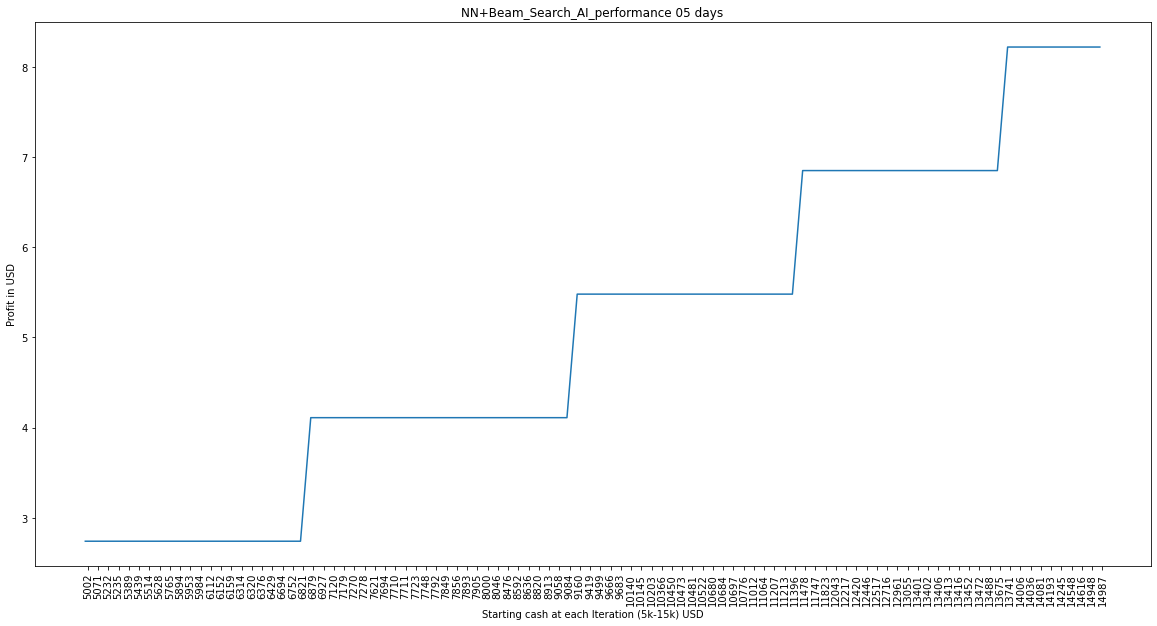

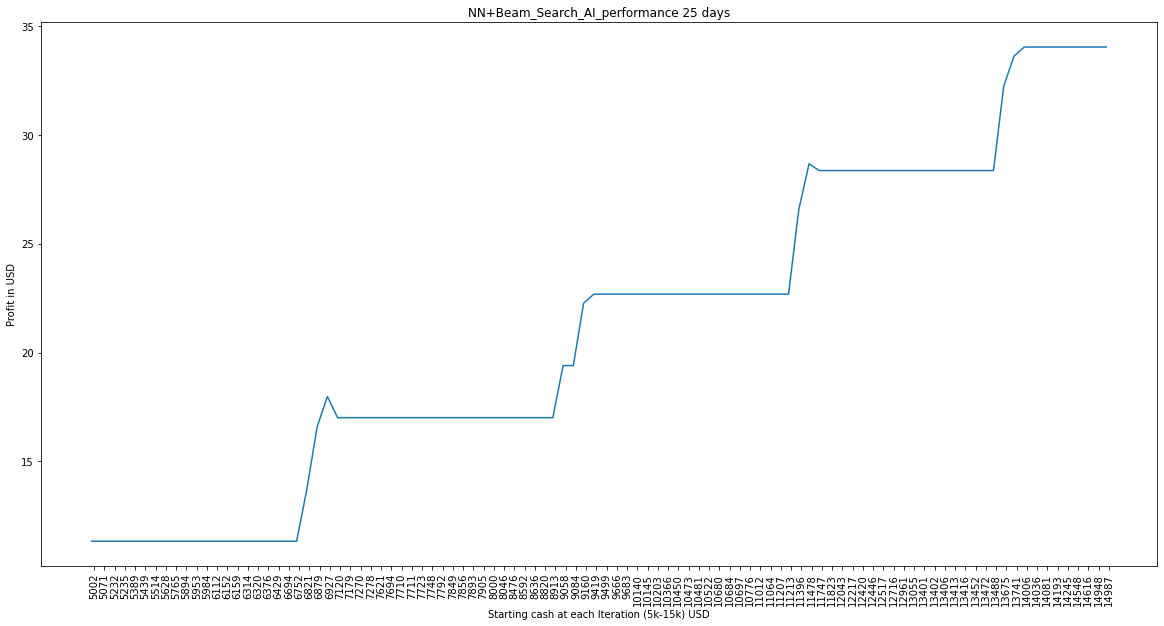

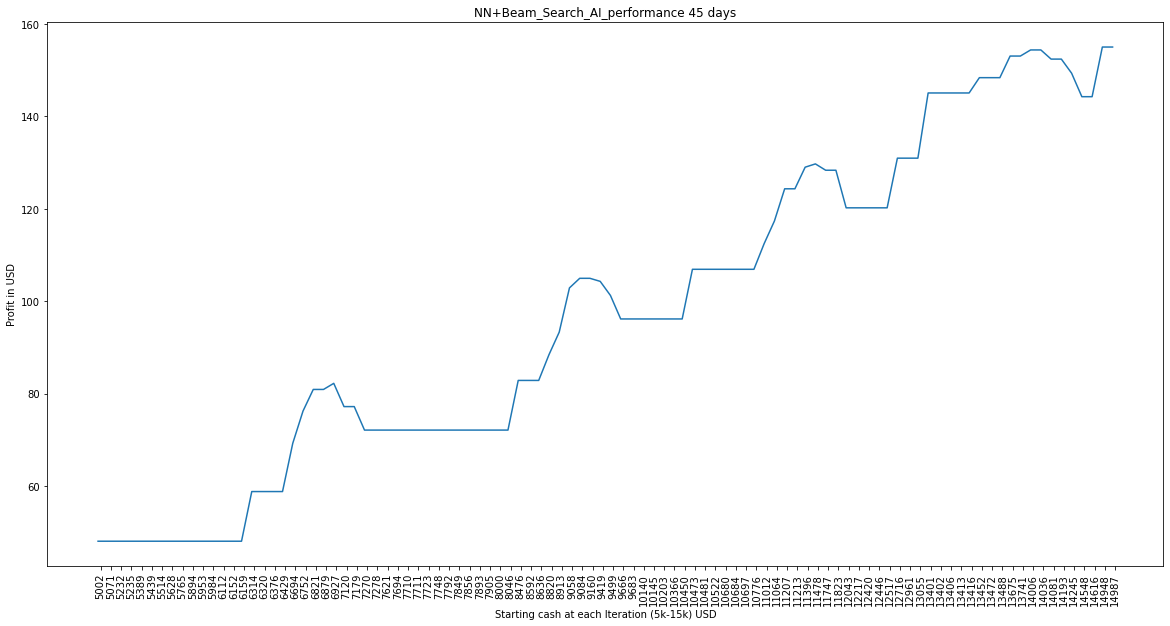

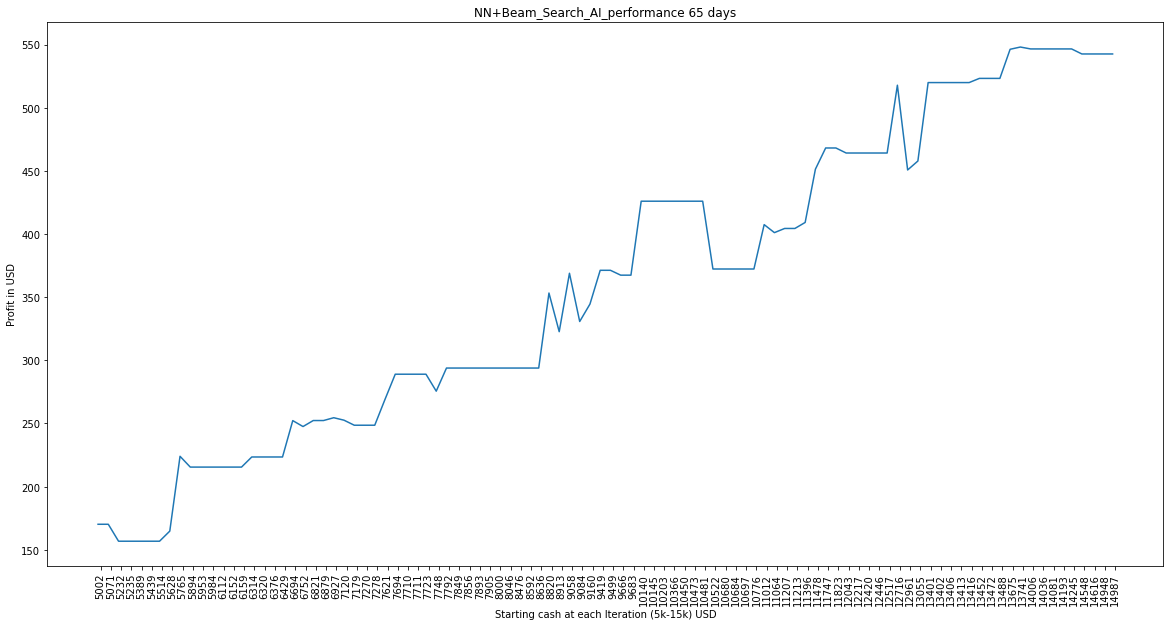

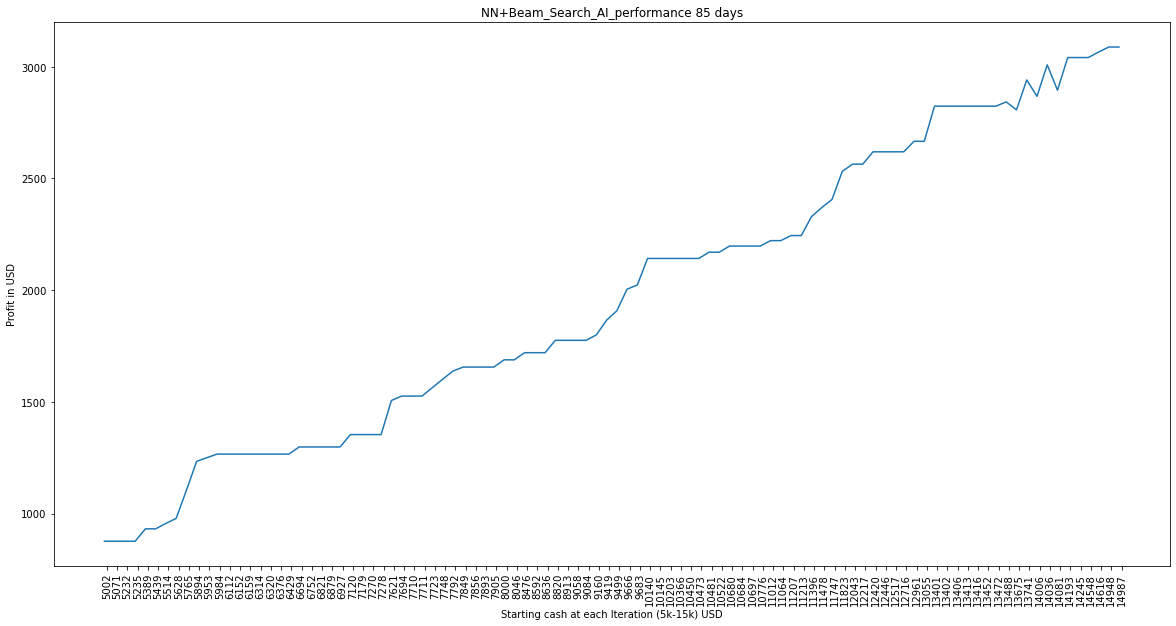

In [59]:
k = 5
    ## Graphs for beam search performance
for size_result in game_len_results:
    #print("Game size = ",k,"Profit/ Loss for 100 iterations in NN + beam search AI:",size_result)
    N = len(size_result)
    ind = np.arange(N) 
    width = 0.5       
        #plt.bar(ind, size_result, width)
    plt.figure(figsize = (20,10))
    plt.plot(ind, size_result)

    plt.ylabel('Profit in USD')
    plt.title('NN+Beam_Search_AI_performance %02d days'%(k))
    plt.xlabel('Starting cash at each Iteration (5k-15k) USD')
    plt.xticks(ind + width / 2, random_cash_list, rotation = 'vertical')
    #plt.legend(loc='best')
    #plt.savefig('Beam_Per%02d.png'%(k),dpi=300, bbox_inches='tight')
    k+=20
    plt.show()

In [60]:
print(actionsListPredicted)

[['h', 'h', 'h', 'h', 'h'], ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'], ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'], ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h'], ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 